<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/Text_Processing(Feature_Extraction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Processing(Feature Extraction)**

In [ ]:
#!pip install spacy
#!pip install WordCloud
# !pip install nltk
# !python -m spacy download en_core_web_md

# Importing Libraries

In [ ]:
import numpy as np       # linear algebra
import pandas as pd      # data processing, CSV file I/O (e.g. pd.read_csv)
import string            # special operations on strings
#import spacy            # language models
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

# Data

In [ ]:
#importing dataset
book=pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt", on_bad_lines='skip') # Replace 'skip' with 'error' to raise an error on bad lines

In [ ]:
#book=pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt",error_bad_lines=False)

In [ ]:
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [ ]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       40 non-null     object
dtypes: object(1)
memory usage: 448.0+ bytes


In [ ]:
book.shape

(40, 1)

In [ ]:
len(book)

40

# Text Preprocessing

In [ ]:
for t in book.x:
    print(t)

It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders
            
Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master i

In [ ]:
book = [t.strip() for t in book.x]   # remove both the leading and the trailing characters
book = [x for x in book if x]      # removes empty strings, because they are considered in Python as False
book[0:5]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [ ]:
#Joining the list into one string/text
text = ' '.join(book)
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [ ]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

# with arguments (x, y, z) ,where 'x' and 'y' must be equal-length strings
# and characters in 'x' are replaced by characters in 'y'.
# 'z' is a string (string.punctuation here)

no_punc_text

'Its amazing battery last around 10 12 hrsbest laptop for students and coders Finally a MacBook possession Got it in 50k in Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine other laptops crash and become defunct in 610 years no antivirus required security of data and transactions much better Terrific sense of possession  prideBad News Problems will be there if you are switching from windows based system  very less space in hard disk no CD drive inability to transfer data from Mac to your existing external hard disc unless you format it apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs Rs 400  all printers are not compatible eg the most economical MFD laser printer RICOH SP 111 cant be used huge compatibility issues with Pages MS Word and Keynote powerpoint unless you master it by working on these still mostly the document and slides ei

# nltk

* Tokenization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens)

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'for', 'students', 'and', 'coders', 'Finally', 'a', 'MacBook', 'possession', 'Got', 'it', 'in', '50k', 'in', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'other', 'laptops', 'crash', 'and', 'become', 'defunct', 'in', '610', 'years', 'no', 'antivirus', 'required', 'security', 'of', 'data', 'and', 'transactions', 'much', 'better', 'Terrific', 'sense', 'of', 'possession', 'prideBad', 'News', 'Problems', 'will', 'be', 'there', 'if', 'you', 'are', 'switching', 'from', 'windows', 'based', 'system', 'very', 'less', 'space', 'in', 'hard', 'disk', 'no', 'CD', 'drive', 'inability', 'to', 'transfer', 'data', 'from', 'Mac', 'to', 'your', 'existing', 'external', 'hard', 'disc', 'unless', 'you', 'format', 'it', 'apps', 'are', 'mostly', 'paid', 'and', 're', 'unreasonably', 'expensive', 'no', 'free', 'apps', 'which'

In [ ]:
len(text_tokens)

3444

* Removing stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
print(my_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Removing stopwords
my_stop_words.append('the')
my_stop_words.append('Its')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'Finally', 'MacBook', 'possession', 'Got', '50k', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptops', 'crash', 'become', 'defunct', '610', 'years', 'antivirus', 'required', 'security', 'data', 'transactions', 'much', 'better', 'Terrific', 'sense', 'possession', 'prideBad', 'News', 'Problems', 'switching', 'windows', 'based', 'system', 'less', 'space', 'hard', 'disk', 'CD', 'drive', 'inability', 'transfer', 'data', 'Mac', 'existing', 'external', 'hard', 'disc', 'unless', 'format', 'apps', 'mostly', 'paid', 'unreasonably', 'expensive', 'free', 'apps', 'available', 'otherwise', 'google', 'play', 'store', 'even', 'angry', 'bird', 'costs', 'Rs', '400', 'printers', 'compatible', 'eg', 'economical', 'MFD', 'laser', 'printer', 'RICOH', 'SP', '111', 'cant', 'used', 'huge', 'compatibility', 

In [ ]:
len(no_stop_tokens)

2072

* Normalize the data

In [ ]:
#Normalize the data(convert everything to lowercase)
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'finally', 'macbook', 'possession', 'got', '50k', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptops', 'crash', 'become', 'defunct', '610', 'years', 'antivirus', 'required', 'security', 'data', 'transactions', 'much', 'better', 'terrific', 'sense', 'possession', 'pridebad', 'news', 'problems', 'switching', 'windows', 'based', 'system', 'less', 'space', 'hard', 'disk', 'cd', 'drive', 'inability', 'transfer', 'data', 'mac', 'existing', 'external', 'hard', 'disc', 'unless', 'format', 'apps', 'mostly', 'paid', 'unreasonably', 'expensive', 'free', 'apps', 'available', 'otherwise', 'google', 'play', 'store', 'even', 'angry', 'bird', 'costs', 'rs', '400', 'printers', 'compatible', 'eg', 'economical', 'mfd', 'laser', 'printer', 'ricoh', 'sp', '111', 'cant', 'used', 'huge', 'compatibility', 

* stemming

In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['amaz', 'batteri', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'student', 'coder', 'final', 'macbook', 'possess', 'got', '50k', 'diwali', 'sale', 'technic', 'good', 'laptopgood', 'newsluxuri', 'product', 'nich', 'technolog', 'good', 'batteri', 'life', 'reliabl', 'machin', 'laptop', 'crash', 'becom', 'defunct', '610', 'year', 'antiviru', 'requir', 'secur', 'data', 'transact', 'much', 'better', 'terrif', 'sens', 'possess', 'pridebad', 'news', 'problem', 'switch', 'window', 'base', 'system', 'less', 'space', 'hard', 'disk', 'cd', 'drive', 'inabl', 'transfer', 'data', 'mac', 'exist', 'extern', 'hard', 'disc', 'unless', 'format', 'app', 'mostli', 'paid', 'unreason', 'expens', 'free', 'app', 'avail', 'otherwis', 'googl', 'play', 'store', 'even', 'angri', 'bird', 'cost', 'rs', '400', 'printer', 'compat', 'eg', 'econom', 'mfd', 'laser', 'printer', 'ricoh', 'sp', '111', 'cant', 'use', 'huge', 'compat', 'issu', 'page', 'ms', 'word', 'keynot', 'powerpoint', 'unless', 'master', 'work', 'st

In [ ]:
ps.stem("producing")

'produc'

# spacy

In [ ]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# NLP english language model of spacy library
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

amazing battery last around 10 12 hrsbest laptop students coders Finally MacBook possession Got 50k Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine laptops crash become defunct 610 years antivirus required security data transactions


In [ ]:
#demo
s = "reasonably well developed"
s1 = nlp(s)
lemmas1 = [word.lemma_ for word in s1]
print(lemmas1)

['reasonably', 'well', 'develop']


In [ ]:
lemmas = [word.lemma_ for word in doc]
print(lemmas)

['amazing', 'battery', 'last', 'around', '10', '12', 'hrsb', 'laptop', 'student', 'coder', 'finally', 'MacBook', 'possession', 'get', '50k', 'Diwali', 'sale', 'technically', 'good', 'laptopgood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptop', 'crash', 'become', 'defunct', '610', 'year', 'antivirus', 'require', 'security', 'datum', 'transaction', 'much', 'well', 'terrific', 'sense', 'possession', 'prideBad', 'News', 'problem', 'switch', 'window', 'base', 'system', 'less', 'space', 'hard', 'disk', 'cd', 'drive', 'inability', 'transfer', 'datum', 'Mac', 'exist', 'external', 'hard', 'disc', 'unless', 'format', 'app', 'mostly', 'pay', 'unreasonably', 'expensive', 'free', 'app', 'available', 'otherwise', 'google', 'play', 'store', 'even', 'angry', 'bird', 'cost', 'r', '400', 'printer', 'compatible', 'eg', 'economical', 'mfd', 'laser', 'printer', 'RICOH', 'SP', '111', 'can', 'not', 'use', 'huge', 'compatibility', 'issue', 'Pages', '

In [ ]:
len(lemmas)

2101

# Feature Extraction

In [ ]:
book

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(book)

In [ ]:
vectorizer.vocabulary_

{'it': 478,
 'amazing': 68,
 'battery': 118,
 'last': 502,
 'around': 93,
 '10': 0,
 '12': 5,
 'hrs': 442,
 'best': 130,
 'laptop': 498,
 'for': 367,
 'students': 849,
 'and': 72,
 'coders': 194,
 'finally': 357,
 'macbook': 536,
 'possession': 673,
 'got': 402,
 'in': 453,
 '50k': 33,
 'diwali': 273,
 'sale': 756,
 'technically': 869,
 'good': 399,
 'news': 594,
 'luxury': 534,
 'product': 694,
 'niche': 597,
 'technology': 870,
 'life': 514,
 'reliable': 727,
 'machine': 537,
 'other': 633,
 'laptops': 500,
 'crash': 227,
 'become': 123,
 'defunct': 248,
 'years': 1004,
 'no': 601,
 'anti': 78,
 'virus': 954,
 'required': 737,
 'security': 774,
 'of': 613,
 'data': 238,
 'transactions': 919,
 'much': 585,
 'better': 131,
 'terrific': 874,
 'sense': 780,
 'pride': 684,
 'bad': 112,
 'problems': 690,
 'will': 980,
 'be': 119,
 'there': 884,
 'if': 446,
 'you': 1006,
 'are': 91,
 'switching': 861,
 'from': 380,
 'windows': 982,
 'based': 116,
 'system': 862,
 'very': 949,
 'less': 511,


In [ ]:
pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(),index=[0]).T

,0
it,478
amazing,68
battery,118
last,502
around,93
...,...
compactness,200
remarkable,728
movie,581
almost,64


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(10)

,0
10,0
104,1
10days,2
11,3
111,4
12,5
12000,6
128,7
128gb,8
13,9


In [ ]:
print(vectorizer.vocabulary_)

{'it': 478, 'amazing': 68, 'battery': 118, 'last': 502, 'around': 93, '10': 0, '12': 5, 'hrs': 442, 'best': 130, 'laptop': 498, 'for': 367, 'students': 849, 'and': 72, 'coders': 194, 'finally': 357, 'macbook': 536, 'possession': 673, 'got': 402, 'in': 453, '50k': 33, 'diwali': 273, 'sale': 756, 'technically': 869, 'good': 399, 'news': 594, 'luxury': 534, 'product': 694, 'niche': 597, 'technology': 870, 'life': 514, 'reliable': 727, 'machine': 537, 'other': 633, 'laptops': 500, 'crash': 227, 'become': 123, 'defunct': 248, 'years': 1004, 'no': 601, 'anti': 78, 'virus': 954, 'required': 737, 'security': 774, 'of': 613, 'data': 238, 'transactions': 919, 'much': 585, 'better': 131, 'terrific': 874, 'sense': 780, 'pride': 684, 'bad': 112, 'problems': 690, 'will': 980, 'be': 119, 'there': 884, 'if': 446, 'you': 1006, 'are': 91, 'switching': 861, 'from': 380, 'windows': 982, 'based': 116, 'system': 862, 'very': 949, 'less': 511, 'space': 821, 'hard': 416, 'disk': 268, 'cd': 177, 'drive': 285, 

In [ ]:
print(vectorizer.get_feature_names_out()[0:100])

['10' '104' '10days' '11' '111' '12' '12000' '128' '128gb' '13' '13000'
 '15' '16' '200' '2013' '2017' '2018' '2019' '2500rs' '256' '256gb' '280'
 '30' '300' '340' '400' '41k' '45000' '46000rs' '47000' '4k' '4k60fps'
 '4th' '50k' '50kdemeritscannot' '52k' '53k' '56k' '57000' '58000rs'
 '5k60fps' '60' '60k' '63k' '80' '84k' '940mx' '9th' 'able' 'about'
 'above' 'accidental' 'accounting' 'acting' 'adapt' 'adding' 'additionaly'
 'advantage' 'affordable' 'after' 'again' 'ahead' 'air' 'all' 'almost'
 'along' 'also' 'am' 'amazing' 'amazon' 'among' 'an' 'and' 'android'
 'angle' 'angry' 'another' 'answer' 'anti' 'any' 'anyone' 'anything' 'app'
 'appario' 'apple' 'applications' 'apprehensive' 'appropriate' 'apps'
 'appsnumbers' 'april' 'are' 'arenot' 'around' 'as' 'asked' 'aspect' 'at'
 'atleast' 'atomic']


In [ ]:
print(X.toarray())

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 2 0 0]
 [0 0 0 ... 2 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
np.shape(X.toarray())

(40, 1010)

In [ ]:
print(X.toarray().shape)

(40, 1010)


#### Let's see how can bigrams and trigrams can be included here

In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 500)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

In [ ]:
bow_matrix_ngram

<40x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2089 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['10' '12' '2017' '4k' '50k' 'about' 'about the' 'above' 'after'
 'after using' 'again' 'air' 'all' 'also' 'am' 'amazing' 'amazon' 'an'
 'and' 'and after' 'and is' 'and it' 'and the' 'and then' 'any' 'apple'
 'apple product' 'apple service' 'apple support' 'apps' 'apps which'
 'apps which are' 'april' 'are' 'are really' 'are way' 'around' 'as'
 'as it' 'asked' 'asked for' 'at' 'at all' 'at the' 'at the price'
 'automatically' 'available' 'awesome' 'back' 'backup' 'bad' 'battery'
 'battery life' 'be' 'be fine' 'be ignored' 'be it' 'be it the' 'be used'
 'because' 'been' 'being' 'best' 'best laptop' 'best laptop for' 'better'
 'better graphics' 'better than' 'bit' 'board' 'book' 'both' 'bought'
 'bought it' 'bought it on' 'bought this' 'bought this macbook' 'box'
 'build' 'but' 'but can' 'but can be' 'but if' 'but if you' 'butter'
 'button' 'buy' 'buying' 'by' 'can' 'can be' 'can be ignored' 'can get'
 'cannot' 'cannot play' 'care' 'carry' 'case' 'center' 'centre' 'charge'
 'checked' 'co

In [ ]:
np.shape(bow_matrix_ngram.toarray())

(40, 500)

#### TF-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features = 200)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['about' 'after' 'again' 'air' 'all' 'also' 'am' 'amazon' 'an' 'and'
 'and it' 'any' 'apple' 'apple product' 'are' 'around' 'as' 'at' 'bad'
 'battery' 'battery life' 'be' 'been' 'best' 'better' 'bought'
 'bought this' 'but' 'buy' 'buying' 'by' 'can' 'can be' 'center' 'centre'
 'cost' 'days' 'dead' 'device' 'did' 'disk' 'display' 'do' 'don' 'even'
 'everything' 'expensive' 'external' 'fine' 'for' 'from' 'from the' 'gb'
 'get' 'go' 'good' 'got' 'graphics' 'great' 'hard' 'hard disk' 'has'
 'have' 'have to' 'however' 'if' 'if you' 'if you are' 'in' 'is' 'is not'
 'is the' 'issue' 'issues' 'it' 'it is' 'it was' 'its' 'just' 'keyboard'
 'know' 'laptop' 'last' 'life' 'light' 'like' 'mac' 'macbook'
 'macbook air' 'macos' 'may' 'me' 'months' 'motherboard' 'ms' 'much' 'my'
 'need' 'need to' 'new' 'no' 'not' 'now' 'of' 'of the' 'on' 'on this'
 'one' 'only' 'option' 'or' 'os' 'other' 'over' 'pay' 'performance'
 'power' 'price' 'pro' 'problem' 'problems' 'product' 'products'
 'purchase' 'quality' '

In [ ]:
np.shape(tf_idf_matrix_n_gram_max_features.toarray())

(40, 200)

#  Generate wordcloud

In [ ]:
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [ ]:
# Import packages
import matplotlib.pyplot as plt
#%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

#Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

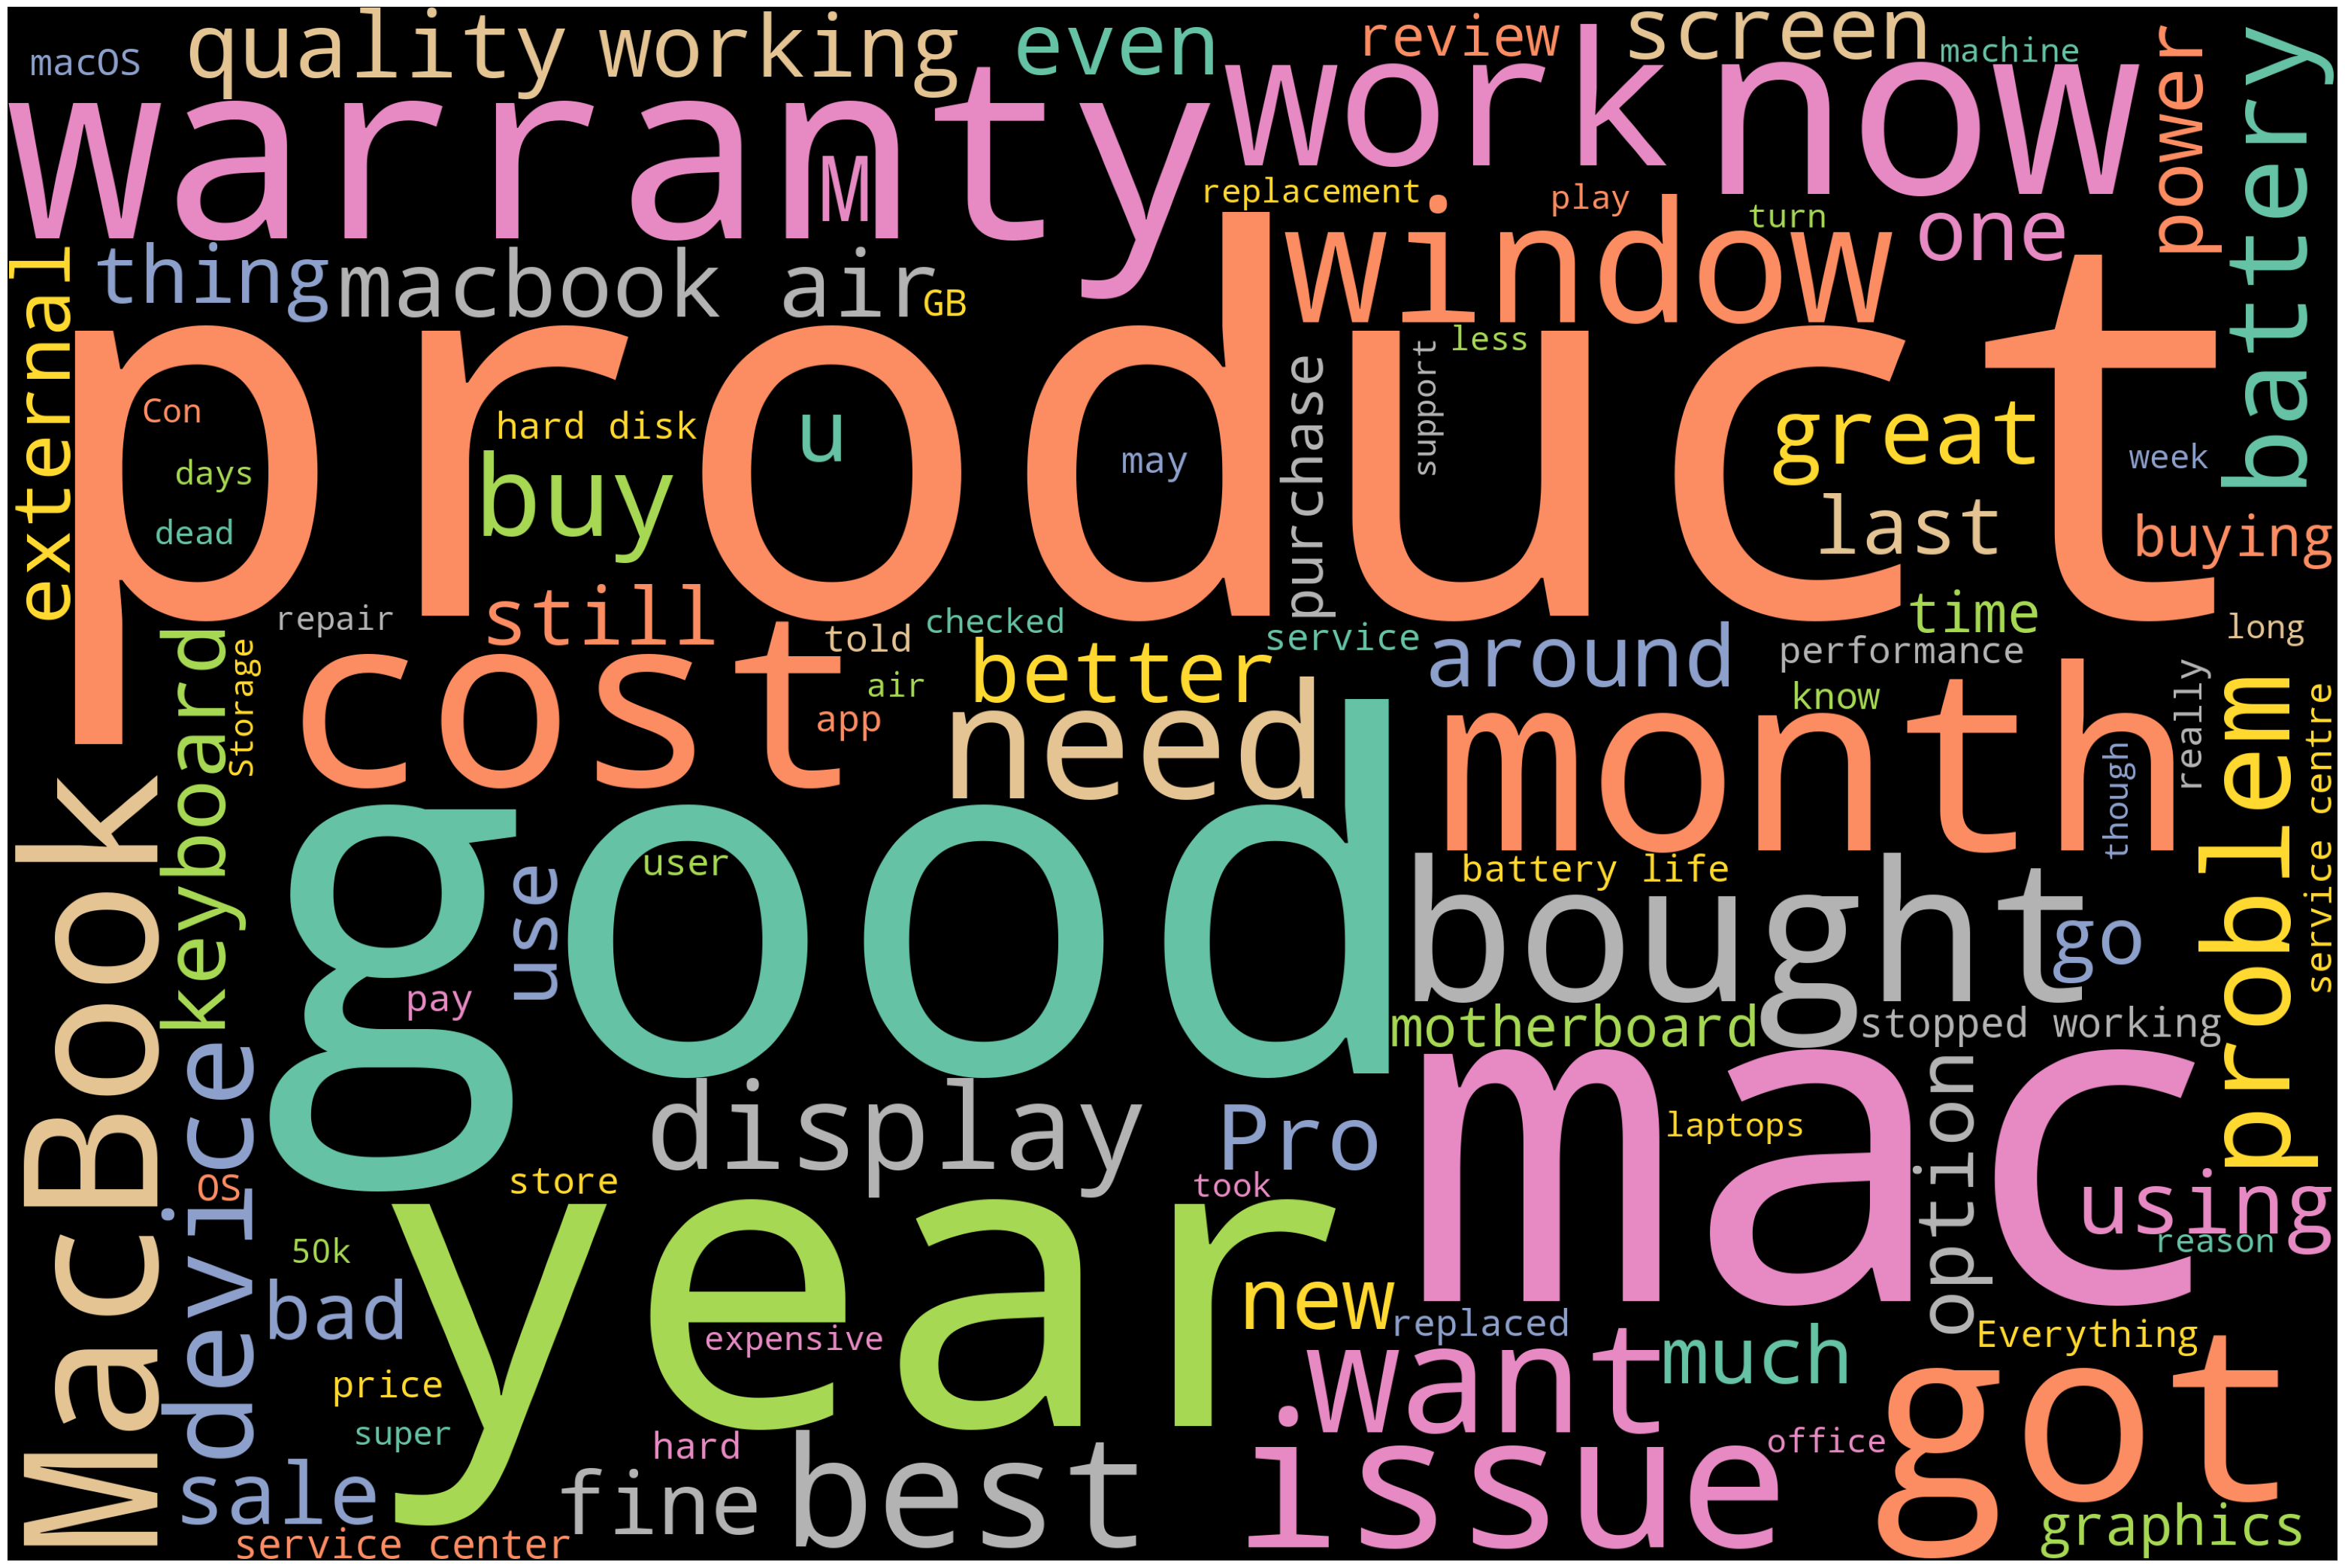

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)


In [ ]:
# Save image
wordcloud.to_file("wordcloud.jpeg")

(-0.5, 2999.5, 1999.5, -0.5)

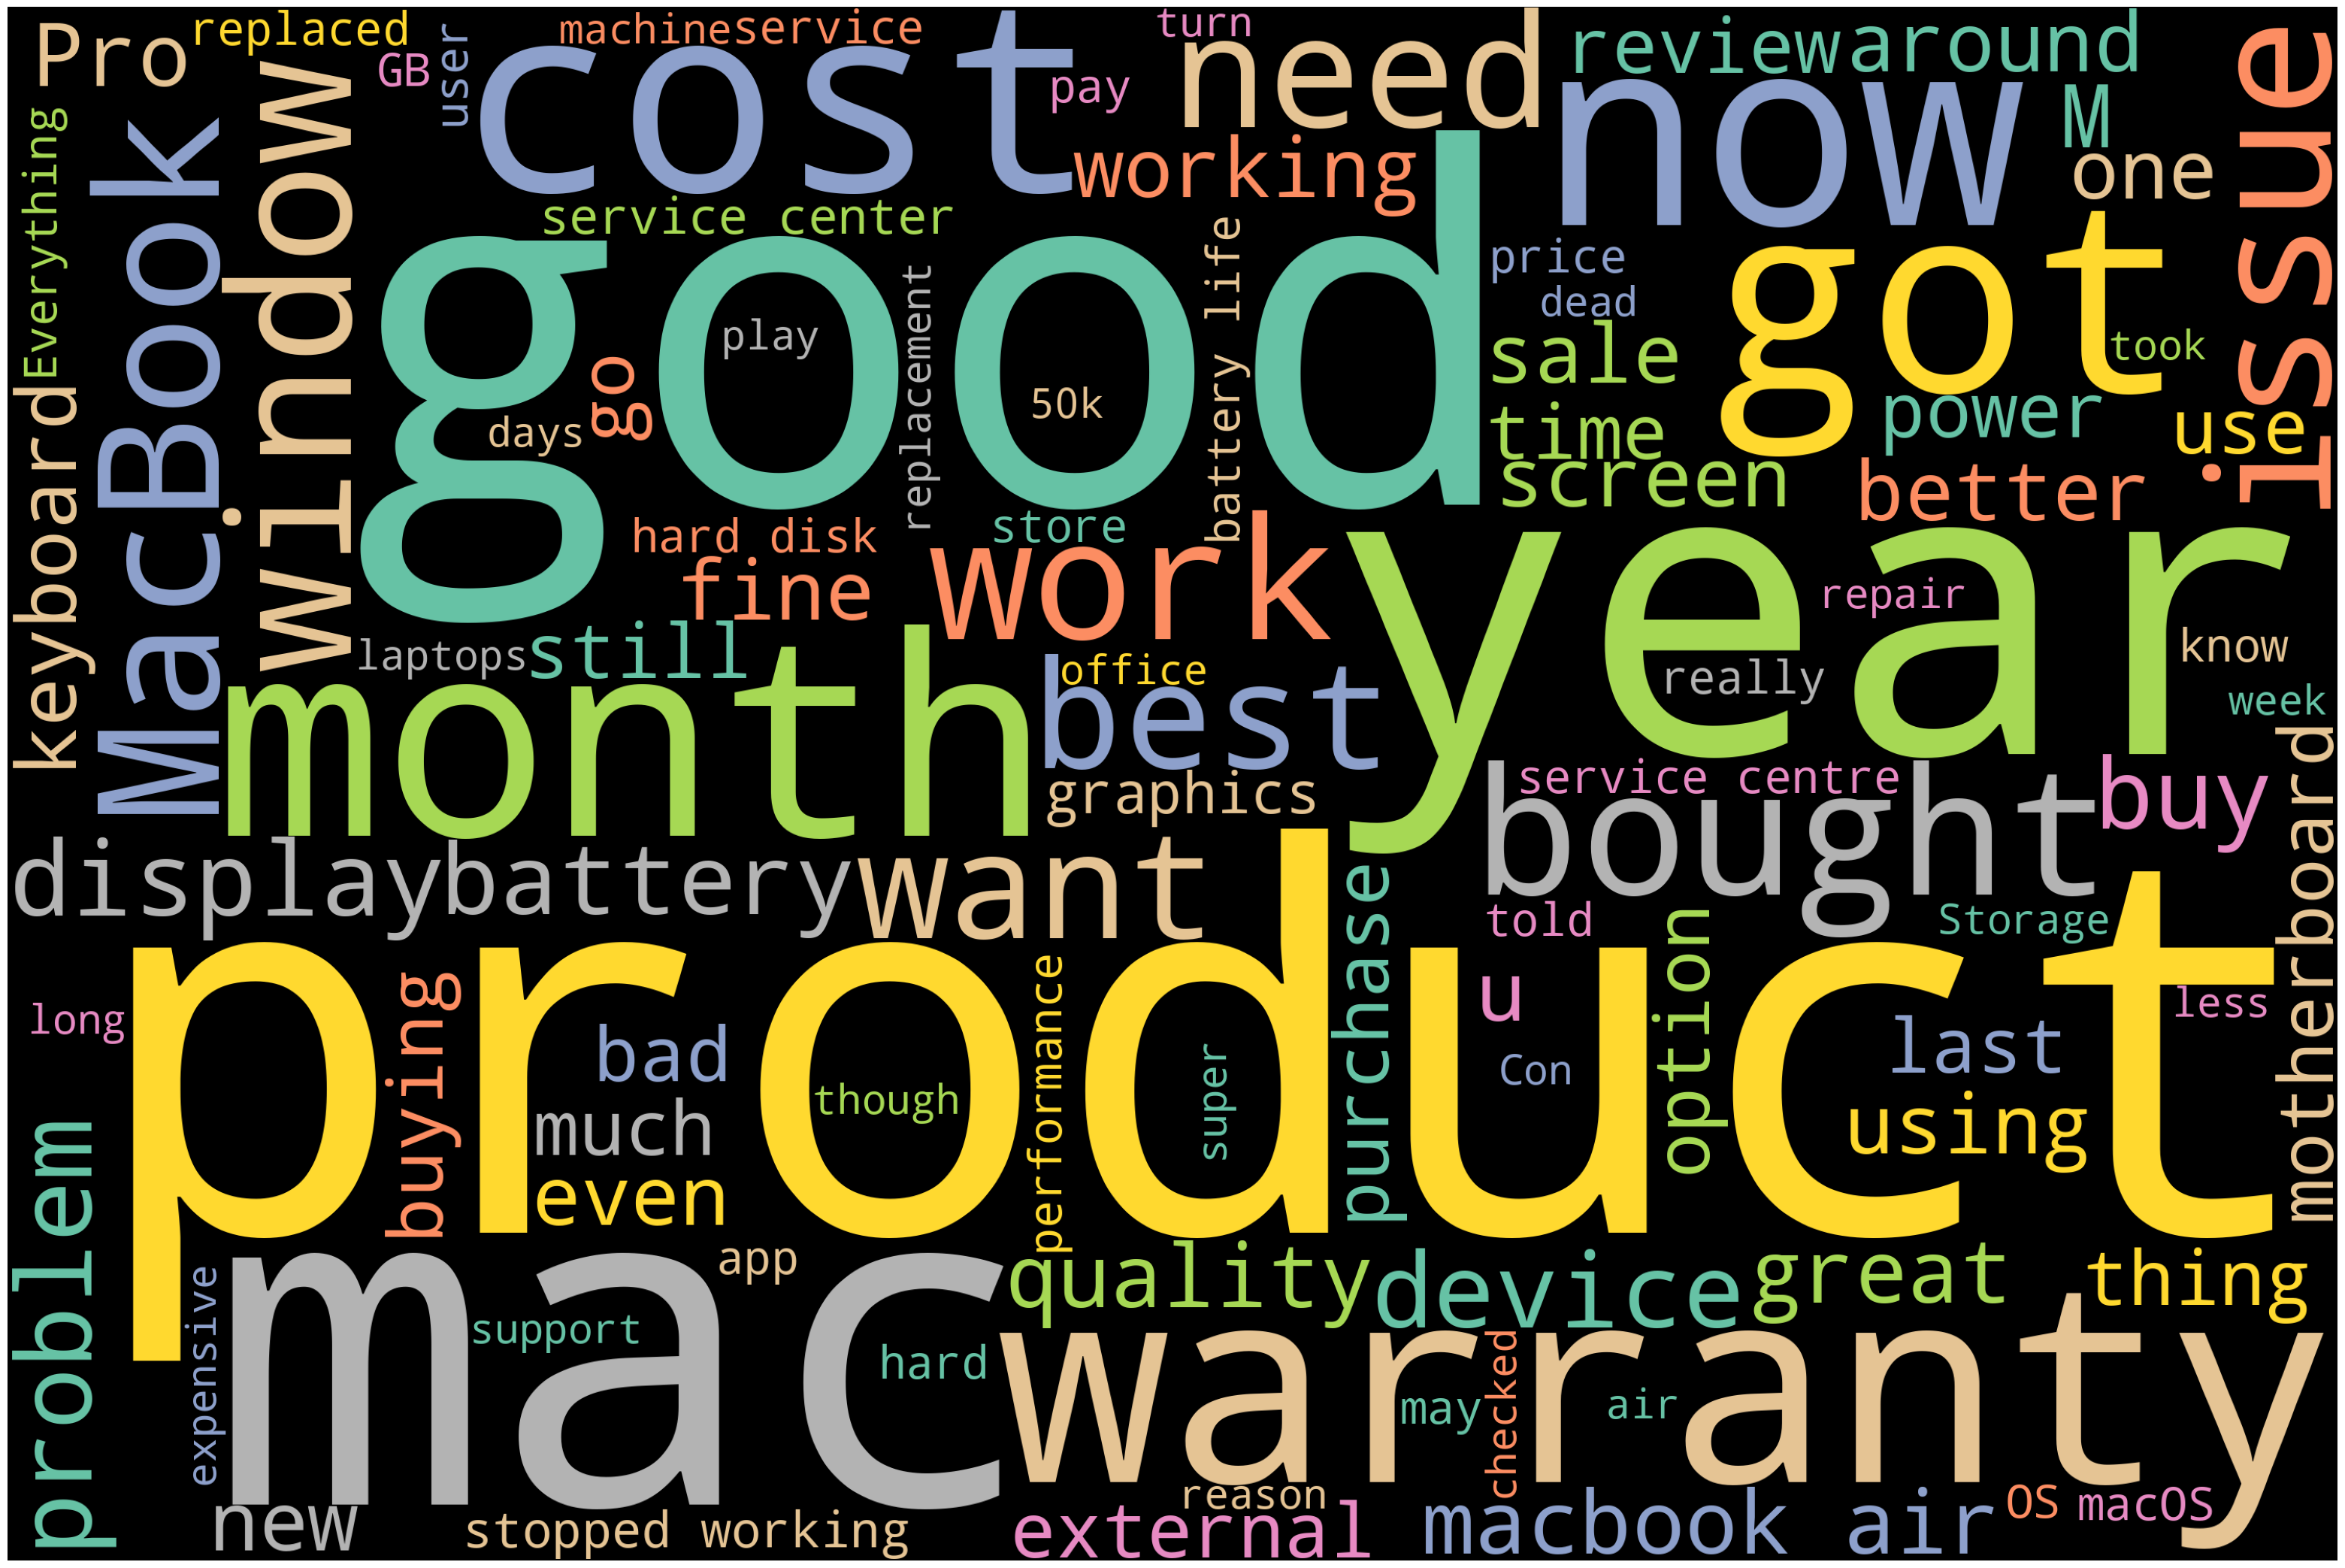

In [ ]:
# Plot word cloud without user defined function
stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plt.figure(figsize=(40, 30))
    # Display image
plt.imshow(wordcloud)
    # No axis details
plt.axis("off")